# Restricted Boltzmann Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/liyz/ann/rbm')
from rbm import RBM

## Load Mnist

In [21]:
import mnist
train_imgs = mnist.train_images()

## Plot Mnist data

In [111]:
def show_mnist(X, title = None, loc = 'center',**kwargs):
    num = X.shape[0]
    if num <= 10:
        imgs = np.moveaxis(X.reshape(-1, num, 28, 28), 1, 2).reshape(-1, num * 28)
        plt.figure(figsize=(num/2,num))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 100 and num % 10 == 0:
        imgs = np.moveaxis(X.reshape(-1, 10, 28, 28), 1, 2).reshape(-1, 10 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 200 and num % 20 == 0:
        imgs = np.moveaxis(X.reshape(-1, 20, 28, 28), 1, 2).reshape(-1, 20 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    else:
        print(f'{num} not fit, choose from:')
        print(list(range(1,10)))
        print([x for x in range(10,100,10)])
        print([x for x in range(100,1000,100)])

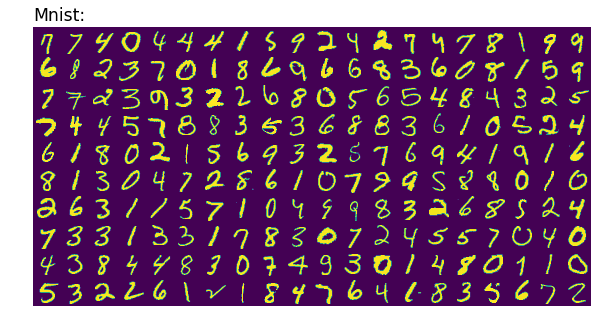

In [114]:
idxs = np.random.randint(0, len(train_imgs), 200) 
show_mnist(train_imgs[idxs],'Mnist:',loc = 'left', fontsize = 'xx-large')

## Initial RBM

In [116]:
mini_x = train_imgs[:5000]
mini_x = mini_x.reshape(5000,-1)
mini_x[mini_x>0] = 1
model = RBM(num_visible = 784, num_hidden = 100)

## Train data

In [120]:
model.cd(mini_x,5000)

Epoch 0: Error is 2286.499431286639
Epoch 100: Error is 2185.1201377562443
Epoch 200: Error is 1975.5775034132976
Epoch 300: Error is 2089.0290631611733
Epoch 400: Error is 1962.3801343737814
Epoch 500: Error is 2030.2221685143775
Epoch 600: Error is 1901.7943097870943
Epoch 700: Error is 2240.9224576489814
Epoch 800: Error is 2190.0628471253995
Epoch 900: Error is 1942.1725191768621
Epoch 1000: Error is 2055.169218954572
Epoch 1100: Error is 2223.0121012964682
Epoch 1200: Error is 2167.815033335854
Epoch 1300: Error is 1942.4583843424389
Epoch 1400: Error is 2018.076575637614
Epoch 1500: Error is 2301.6389305853786
Epoch 1600: Error is 2010.826306646528
Epoch 1700: Error is 2224.6610830680575
Epoch 1800: Error is 2214.4031509453407
Epoch 1900: Error is 1968.740161113726
Epoch 2000: Error is 1879.9748707276085
Epoch 2100: Error is 1937.0187116995578
Epoch 2200: Error is 2126.042428095282
Epoch 2300: Error is 1995.0338058364741
Epoch 2400: Error is 2045.5910438684411
Epoch 2500: Error i

## Reconstruct data

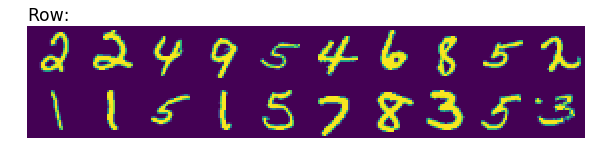

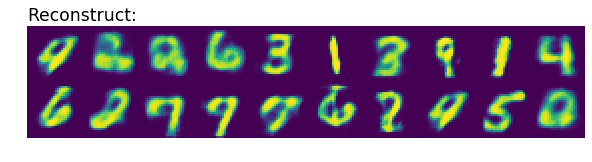

In [121]:
idxs = np.random.choice(len(train_imgs), 20)
row = train_imgs[idxs].reshape(20,-1)
reconstruct = model.reconstruct(x)
show_mnist(row,'Row:', loc= 'left', fontsize = 'xx-large')
show_mnist(reconstruct,'Reconstruct:',loc = 'left', fontsize = 'xx-large')


## Visulize the Weights

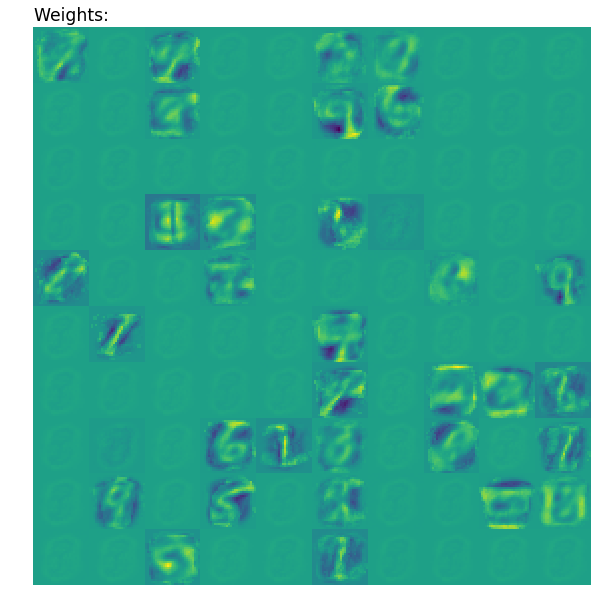

In [123]:
weights = model.weights.T
show_mnist(weights,'Weights:',loc = 'left', fontsize = 'xx-large')